## **Exponential Weighted Moving Average (EWMA)**

#### **Importing Libraries**

In [ ]:
# loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Download link: [Daily Delhi Climate](https://drive.google.com/file/d/1RhZHOVoFi3MsCi9QJdvKHRk-TctrhUdb/view?usp=drive_link)

In [11]:
# loading the data
climate_data = pd.read_csv('../datasets/DailyDelhiClimateTest.csv')
print(f"Shape of the dataset: {climate_data.shape}")
climate_data.head()

Shape of the dataset: (114, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
# columns datatypes and null values

climate_data = climate_data[['date', 'meantemp']]
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      114 non-null    object 
 1   meantemp  114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
# coverting the 'object' type to datetime

climate_data['date'] = pd.to_datetime(climate_data['date'])

In [14]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      114 non-null    datetime64[ns]
 1   meantemp  114 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


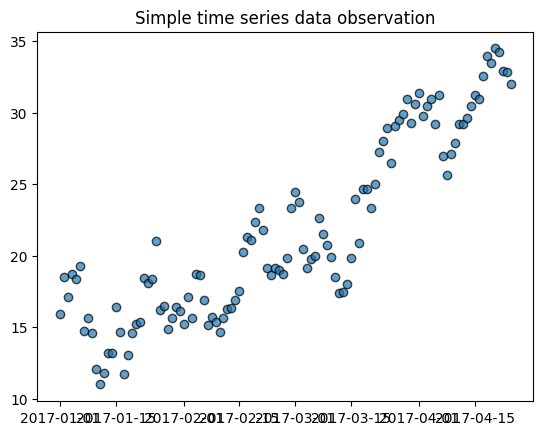

In [15]:
# viewing the data

plt.scatter(climate_data['date'], climate_data['meantemp'], edgecolor='k', alpha=0.7)
plt.title("Simple time series data observation")
plt.show()

In [26]:
# alpha = 1 - beta
# as beta value increases, the graph becomes smoother

x1 = climate_data['meantemp'].ewm(alpha=0.9).mean()
x2 = climate_data['meantemp'].ewm(alpha=0.6).mean()
x3 = climate_data['meantemp'].ewm(alpha=0.4).mean()
x4 = climate_data['meantemp'].ewm(alpha=0.1).mean()


In [27]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [28]:
climate_data['EWMA_1'] = x1.copy()
climate_data['EWMA_2'] = x2.copy()
climate_data['EWMA_3'] = x3.copy()
climate_data['EWMA_4'] = x4.copy()
climate_data.head()

,date,meantemp,EWMA_1,EWMA_2,EWMA_3,EWMA_4
0,2017-01-01,15.913043,15.913043,15.913043,15.913043,15.913043
1,2017-01-02,18.500000,18.264822,17.760870,17.529891,17.274600
2,2017-01-03,17.111111,17.225443,17.344358,17.316228,17.214272
3,2017-01-04,18.700000,18.552677,18.179113,17.952153,17.646295
4,2017-01-05,18.388889,18.405266,18.306281,18.141577,17.827632


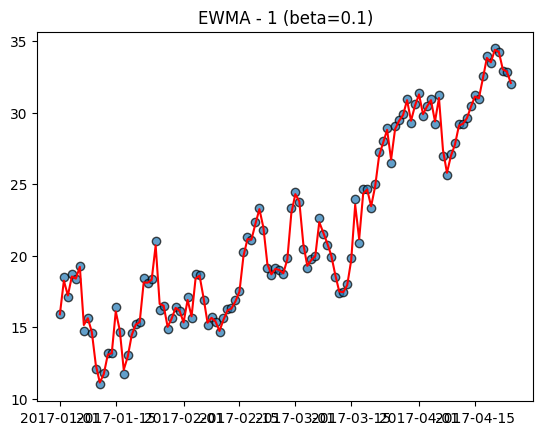

In [24]:
# viewing the data
# beta = 0.1

plt.scatter(climate_data['date'], climate_data['meantemp'], edgecolor='k', alpha=0.7)
plt.plot(climate_data['date'], climate_data['EWMA_1'], c='r')
plt.title("EWMA - 1 (beta=0.1)")
plt.show()

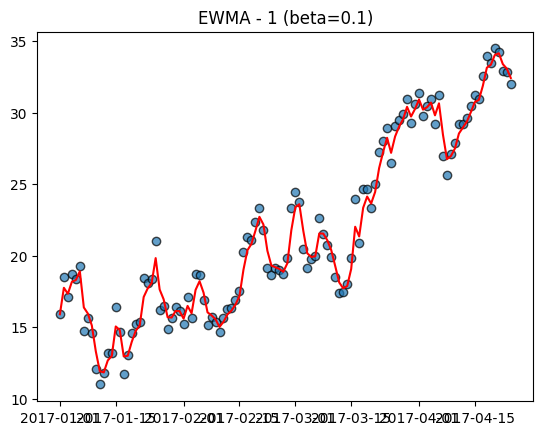

In [ ]:
# beta = 0.4

plt.scatter(climate_data['date'], climate_data['meantemp'], edgecolor='k', alpha=0.7)
plt.plot(climate_data['date'], climate_data['EWMA_2'], c='r')
plt.title("EWMA - 1 (beta=0.1)")
plt.show()

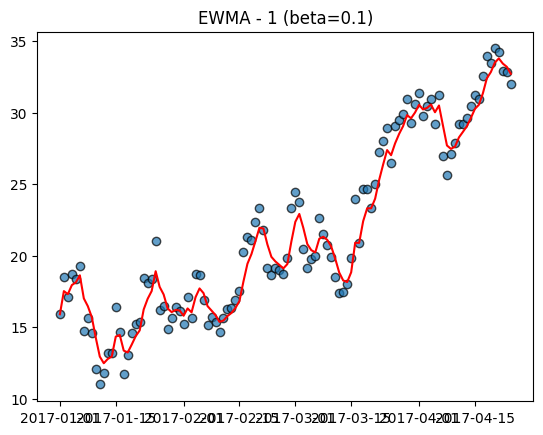

In [ ]:
# beta = 0.6

plt.scatter(climate_data['date'], climate_data['meantemp'], edgecolor='k', alpha=0.7)
plt.plot(climate_data['date'], climate_data['EWMA_3'], c='r')
plt.title("EWMA - 1 (beta=0.1)")
plt.show()

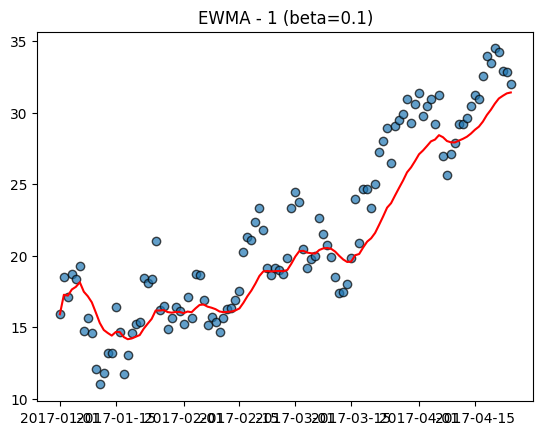

In [ ]:
# beta = 0.9

plt.scatter(climate_data['date'], climate_data['meantemp'], edgecolor='k', alpha=0.7)
plt.plot(climate_data['date'], climate_data['EWMA_4'], c='r')
plt.title("EWMA - 1 (beta=0.1)")
plt.show()